In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp


import seawater
import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc

import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
from matplotlib import reload
import arrow
import gsw
%matplotlib inline

/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


# Question:

If we change the atmospheric concentration of CO2 from 280 umol to ~400 umol, what are the effects on the salish sea system? 


### Subquestions:

    1. Does the system as a whole store more carbon?
    2. Does the surface ocean store more carbon?
    2a. Does the upper layer (top 50m?) store more carbon?
    3. How much of the carbon gets exported to the open ocean?
    4. How much gets taken up by phytoplankton? (black box)
        How to measure this? stronger drawdown?
    5. How much gets outgassed?
    
    
    BUDGET:
    
    DIC_strait = DIC_riv + CO2_flux + UPTAKE/REMIN + BOUNDARY_TRANSPORT
    Needn't be steady-state
    

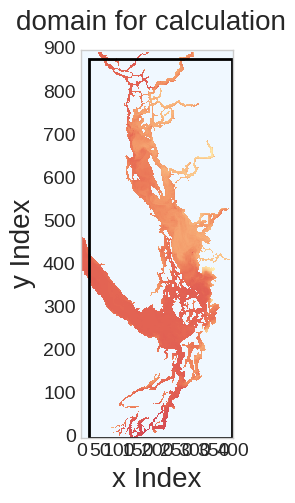

In [4]:
t_nc = nc.Dataset('/results2/SalishSea/nowcast-green.201806/01jan18/SalishSea_1h_20180101_20180101_grid_T.nc')
surfdat_1 = t_nc.variables['votemper'][0,0,:,:]

fig, ax = plt.subplots(1, 1, figsize=(5, 5), sharey=True)
cmap = cm.cm.matter
tplt = np.ma.masked_values(surfdat_1,0)
v_min = 2000
v_max = 2000

viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(tplt, cmap=cm.cm.matter, vmin=0, vmax=20)

ax.set_xlabel('x Index', fontsize = 20 )
ax.set_ylabel('y Index', fontsize = 20 )

pat = patches.Rectangle((20,0),398-20,898-20,linewidth=2,edgecolor='k',facecolor='none')
ax.add_patch(pat)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
cmap.set_bad('aliceblue')
plt.suptitle('domain for calculation',fontsize=20)


In [5]:
BR_nc = nc.Dataset('MASSBAL_BR2015_to1231_spinup.nc')
PI_nc = nc.Dataset('MASSBAL_PI2015_to1231_spinup.nc')

In [6]:
BR_nc = nc.Dataset('MASSBAL_BR2015_to1231_spinup.nc')
PI_nc = nc.Dataset('MASSBAL_PI2015_to1231_spinup.nc')
stor_mol_BR = BR_nc['model_output']['stor_mol_BR']
stor_mol_surf_BR = BR_nc['model_output']['stor_mol_surf_BR']
stor_20_BR = BR_nc['model_output']['stor_mol_20_BR']
stor_20_100_BR = BR_nc['model_output']['stor_mol_20_100_BR']
stor_deep_BR = BR_nc['model_output']['stor_mol_deep_BR']
stor_flx_BR = BR_nc['model_output']['stor_flx_BR']
stor_trans_BR =BR_nc['model_output']['stor_trans_BR']

ts_BR = np.arange(0,np.size(stor_trans_BR),1)


stor_mol_PI = PI_nc['model_output']['stor_mol_PI']
stor_mol_surf_PI = PI_nc['model_output']['stor_mol_surf_PI']
stor_20_PI = PI_nc['model_output']['stor_mol_20_PI']
stor_20_100_PI = PI_nc['model_output']['stor_mol_20_100_PI']
stor_deep_PI = PI_nc['model_output']['stor_mol_deep_PI']
stor_flx_PI = PI_nc['model_output']['stor_flx_PI']
stor_trans_PI =PI_nc['model_output']['stor_trans_PI']

ts_PI = np.arange(0,np.size(stor_trans_BR),1)

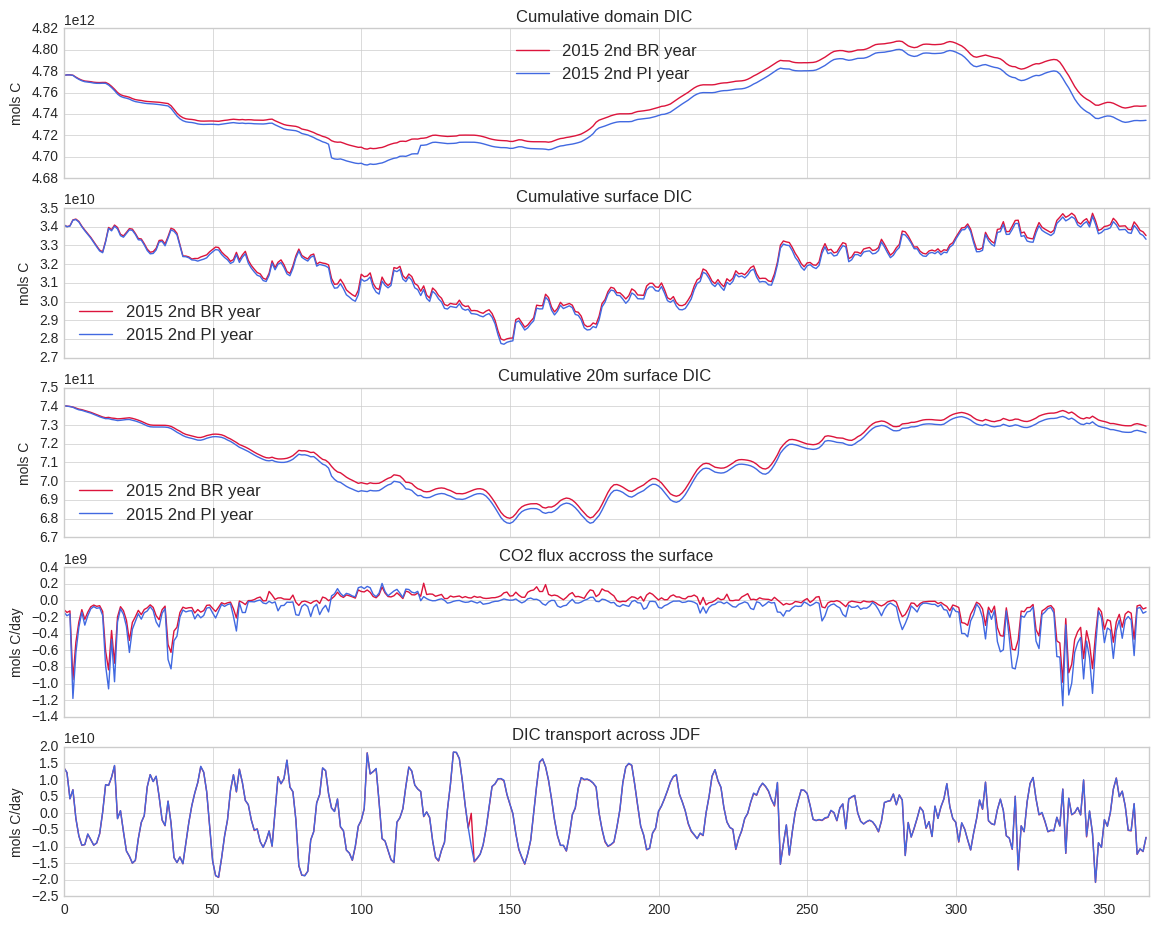

In [7]:
figstring = 'this'
fig = plt.figure(figsize=(10*1.4,8*1.4))

ax = fig.add_subplot(5,1,1)
ax.plot(ts_BR,stor_mol_BR,color = 'crimson',label = '2015 2nd BR year')
ax.plot(ts_BR,stor_mol_PI,color = 'royalblue',label = '2015 2nd PI year')
plt.xlim([0,365])
ax.legend(loc = 'best')
ax.set_xticklabels([])
ax.set_ylabel('mols C')
plt.title('Cumulative domain DIC ')

ax = fig.add_subplot(5,1,2)
ax.plot(ts_BR,stor_mol_surf_BR,color = 'crimson',label = '2015 2nd BR year')
ax.plot(ts_BR,stor_mol_surf_PI,color = 'royalblue',label = '2015 2nd PI year')
ax.legend(loc = 'best')
ax.set_xticklabels([])
ax.set_ylabel('mols C')
plt.xlim([0,365])
plt.title('Cumulative surface DIC ')

ax = fig.add_subplot(5,1,3)
ax.plot(ts_BR,stor_20_BR,color = 'crimson',label = '2015 2nd BR year')
ax.plot(ts_BR,stor_20_PI,color = 'royalblue',label = '2015 2nd PI year')
ax.legend(loc = 'best')
ax.set_ylabel('mols C')
plt.xlim([0,365])
ax.set_xticklabels([])
plt.title('Cumulative 20m surface DIC ')
 
ax = fig.add_subplot(5,1,4)
ax.plot(ts_BR,stor_flx_BR,color = 'crimson',label = '2015 2nd BR year')
ax.plot(ts_BR,stor_flx_PI,color = 'royalblue',label = '2015 2nd PI year')
plt.xlim([0,365])
ax.set_xticklabels([])
ax.set_ylabel('mols C/day')
plt.title('CO2 flux accross the surface')

ax = fig.add_subplot(5,1,5)
ax.plot(ts_BR,stor_trans_BR,color = 'crimson',label = '2015 2nd BR year')
ax.plot(ts_BR,stor_trans_PI,color = 'royalblue',label = '2015 2nd PI year')
plt.xlim([0,365])
#ax.set_xticklabels([])
ax.set_ylabel('mols C/day')

plt.title('DIC transport across JDF')


#t_figstring = './FIGS/' + figstring + 'cumuflx.jpg'


#fig.savefig(t_figstring)


In [8]:
print('end_of_year carbon')
EOY_BR = np.sum(stor_mol_BR[np.size(stor_trans_BR)-1])
EOY_PI = np.sum(stor_mol_PI[np.size(stor_trans_BR)-1])
BR_CCHANGE = (stor_mol_BR[np.size(stor_trans_BR)-1]-(stor_mol_BR[0]))
PI_CCHANGE = (stor_mol_PI[np.size(stor_trans_PI)-1]-(stor_mol_PI[0]))
FLUX_BR = np.sum(stor_flx_BR)
FLUX_PI = np.sum(stor_flx_PI)
JDFTRANS_BR = np.sum(stor_trans_BR)
JDFTRANS_PI = np.sum(stor_trans_PI)
river_load = np.sum(1.645e11)
river_load = np.float32(river_load)
blackbox_BR = (BR_CCHANGE - (FLUX_BR + JDFTRANS_BR + river_load))
blackbox_PI = (PI_CCHANGE - (FLUX_PI + JDFTRANS_PI + river_load))

# print('baserun')
# print(EOY_BR)
# print('preind')
# print(EOY_PI)
# print('difference')
# print(EOY_BR - EOY_PI)
# print('baserun - change in C')
# print(BR_CCHANGE)
# print('preind - change in C')
# print(PI_CCHANGE)
# print('')
# print('CO2flux')
# print('baserun')
# print(FLUX_BR)
# print('preind')
# print(FLUX_PI)
# print('difference')
# print(FLUX_BR - FLUX_PI)
# print('')
# print('TRANSPORTS-jdf')
# print('baserun trans')
# print(JDFTRANS_BR)
# print('pi trans')
# print(JDFTRANS_PI)
# print('difference')
# print(JDFTRANS_BR - JDFTRANS_PI)
# plt.show()
# print('')


# print('**')
# print('change in C - baserun')
# print(BR_CCHANGE)
# print('jdfflux + co2 flux')
# print(FLUX_BR + JDFTRANS_BR)
# print('jdfflux + co2 flux + river_load')
# print((FLUX_BR + JDFTRANS_BR + river_load))
# print('difference between CHANGE and (jdfflux + co2 flux + river_load)')

# print(blackbox_BR)
# print('**')
# print('change in C - pi')
# print(PI_CCHANGE)
# print('jdfflux + co2 flux')
# print(FLUX_PI + JDFTRANS_PI)
# print('jdfflux + co2 flux + river_load')
# print(FLUX_PI + JDFTRANS_PI + river_load)
# print('difference between CHANGE and (jdfflux + co2 flux + river_load)')
# print(blackbox_PI)

end_of_year carbon


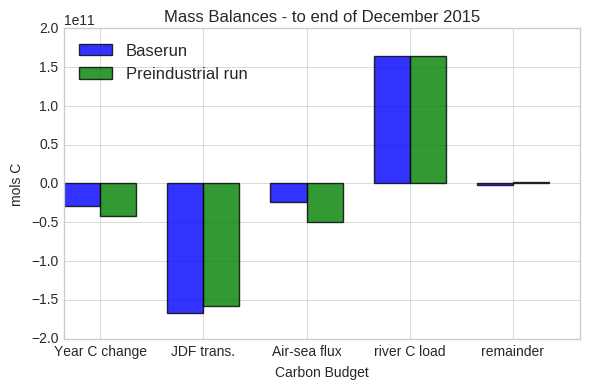

In [9]:
# data to plot
n_groups = 5
BR_stats = (BR_CCHANGE, JDFTRANS_BR, FLUX_BR, river_load, blackbox_BR)
PI_stats = (PI_CCHANGE, JDFTRANS_PI, FLUX_PI, river_load, blackbox_PI)


# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, BR_stats, bar_width,
alpha=opacity,
color='b',
label='Baserun')

rects2 = plt.bar(index + bar_width, PI_stats, bar_width,
alpha=opacity,
color='g',
label='Preindustrial run')

plt.xlabel('Carbon Budget')
plt.ylabel('mols C')
plt.title('Mass Balances - to end of December 2015')
plt.xticks(index + bar_width, ('Year C change', 'JDF trans.', 'Air-sea flux', 'river C load', 'remainder'))
plt.legend(loc = 'best')

plt.tight_layout()
plt.show()

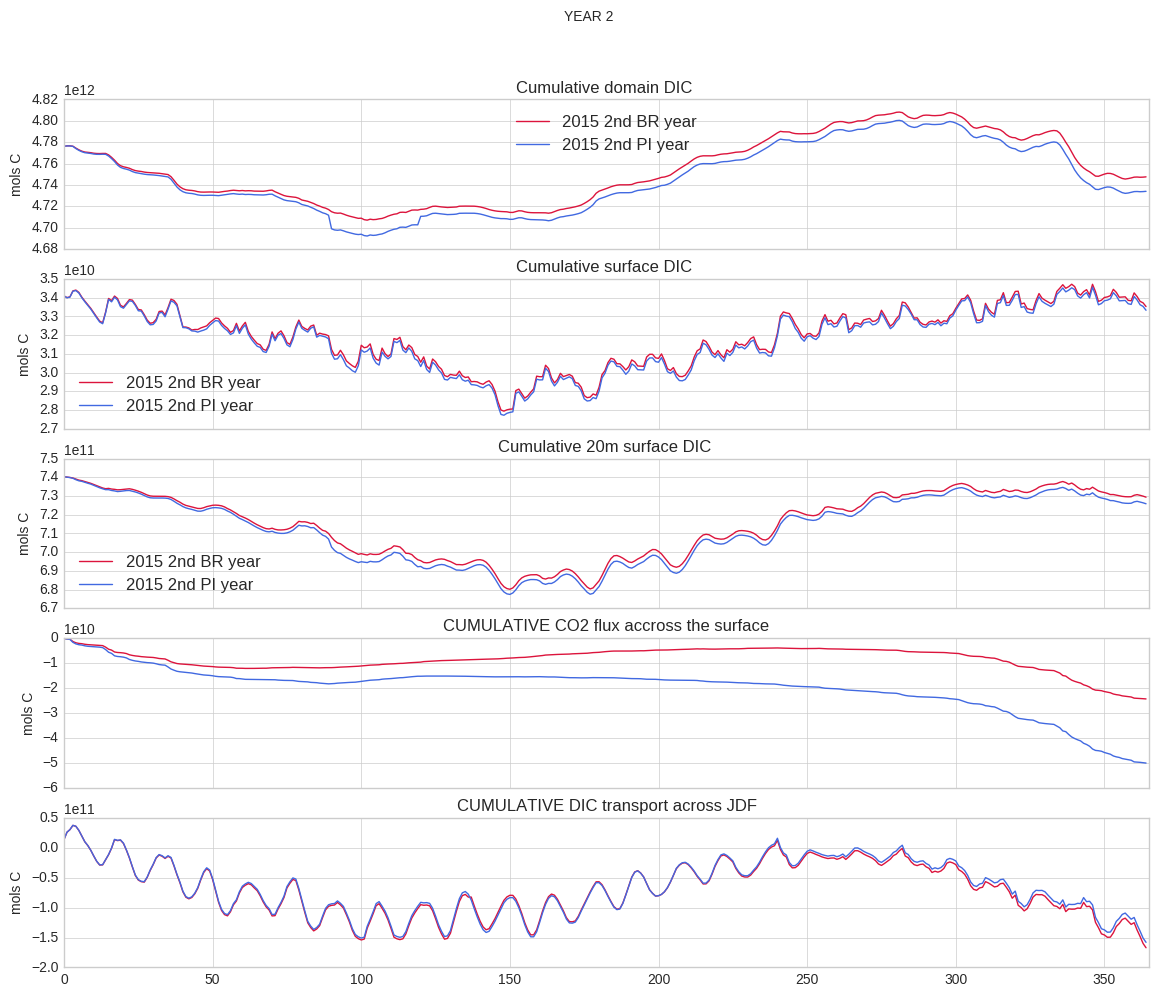

In [10]:
flx_BR = stor_flx_BR[:]
flx_PI = stor_flx_PI[:]

trans_BR = stor_trans_BR[:]
trans_PI = stor_trans_PI[:]

flx_BR_cum = np.cumsum(flx_BR)
flx_PI_cum = np.cumsum(flx_PI)

trans_BR_cum = np.cumsum(trans_BR)
trans_PI_cum = np.cumsum(trans_PI)

figstring = 'this'
fig = plt.figure(figsize=(10*1.4,8*1.4))

ax = fig.add_subplot(5,1,1)
ax.plot(ts_BR,stor_mol_BR,color = 'crimson',label = '2015 2nd BR year')
ax.plot(ts_BR,stor_mol_PI,color = 'royalblue',label = '2015 2nd PI year')
plt.xlim([0,365])
ax.legend(loc = 'best')
ax.set_xticklabels([])
ax.set_ylabel('mols C')
plt.title('Cumulative domain DIC ')

ax = fig.add_subplot(5,1,2)
ax.plot(ts_BR,stor_mol_surf_BR,color = 'crimson',label = '2015 2nd BR year')
ax.plot(ts_BR,stor_mol_surf_PI,color = 'royalblue',label = '2015 2nd PI year')
ax.legend(loc = 'best')
ax.set_xticklabels([])
ax.set_ylabel('mols C')
plt.xlim([0,365])
plt.title('Cumulative surface DIC ')

ax = fig.add_subplot(5,1,3)
ax.plot(ts_BR,stor_20_BR,color = 'crimson',label = '2015 2nd BR year')
ax.plot(ts_BR,stor_20_PI,color = 'royalblue',label = '2015 2nd PI year')
ax.legend(loc = 'best')
ax.set_ylabel('mols C')
plt.xlim([0,365])
ax.set_xticklabels([])
plt.title('Cumulative 20m surface DIC ')
 
ax = fig.add_subplot(5,1,4)
ax.plot(ts_BR,flx_BR_cum,color = 'crimson',label = '2015 2nd BR year')
ax.plot(ts_BR,flx_PI_cum,color = 'royalblue',label = '2015 2nd PI year')
plt.xlim([0,365])
ax.set_xticklabels([])
ax.set_ylabel('mols C')
plt.title('CUMULATIVE CO2 flux accross the surface')

ax = fig.add_subplot(5,1,5)
ax.plot(ts_BR,trans_BR_cum,color = 'crimson',label = '2015 2nd BR year')
ax.plot(ts_BR,trans_PI_cum,color = 'royalblue',label = '2015 2nd PI year')
plt.xlim([0,365])
#ax.set_xticklabels([])
ax.set_ylabel('mols C')

plt.title('CUMULATIVE DIC transport across JDF')

plt.suptitle('YEAR 2')

#t_figstring = './FIGS/' + figstring + 'cumuflx.jpg'


#fig.savefig(t_figstring)


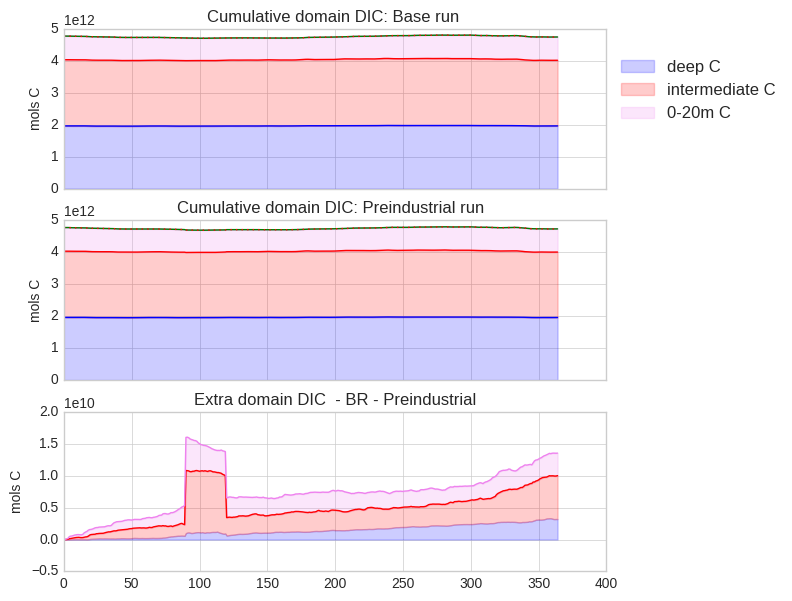

In [11]:
xs = np.arange(0,len(stor_20_100_BR),1)

c_deep_BR = stor_deep_BR[:]
c_20_100_BR = stor_20_100_BR[:]
c_0_20_BR = stor_20_BR[:]
c_tot_BR = stor_mol_BR[:]
c_tot_fromsum_BR = c_deep_BR+c_20_100_BR+c_0_20_BR

c_deep_PI = stor_deep_PI[:]
c_20_100_PI = stor_20_100_PI[:]
c_0_20_PI = stor_20_PI[:]
c_tot_PI = stor_mol_PI[:]
c_tot_fromsum_PI = c_deep_PI+c_20_100_PI+c_0_20_PI

fig = plt.figure(figsize=(7,7))

ax = fig.add_subplot(3,1,1)
ax.plot(xs,c_deep_BR)
ax.fill_between(xs,c_deep_BR,0,color = 'blue', alpha = 0.2, label = 'deep C')
ax.plot(xs,c_deep_BR + c_20_100_BR, color = 'red' )
ax.fill_between(xs,c_deep_BR + c_20_100_BR,c_deep_BR, color = 'red',alpha = 0.2, label = 'intermediate C')
ax.plot(xs, c_deep_BR + c_20_100_BR + c_0_20_BR, color = 'violet')
ax.fill_between(xs,c_deep_BR + c_20_100_BR + c_0_20_BR,c_deep_BR + c_20_100_BR, color = 'violet',alpha = 0.2, label = '0-20m')
ax.plot(xs,c_tot_BR)
ax.plot(xs,c_tot_fromsum_BR, linestyle = ':')
ax.set_xticklabels([])
ax.set_ylabel('mols C')
plt.title('Cumulative domain DIC: Base run ')

ax = fig.add_subplot(3,1,2)
ax.plot(xs,c_deep_PI)
ax.fill_between(xs,c_deep_PI,0,color = 'blue', alpha = 0.2, label = 'deep C')
ax.plot(xs,c_deep_PI + c_20_100_PI, color = 'red' )
ax.fill_between(xs,c_deep_PI + c_20_100_PI,c_deep_PI, color = 'red',alpha = 0.2, label = 'intermediate C')
ax.plot(xs, c_deep_PI + c_20_100_PI + c_0_20_PI, color = 'violet')
ax.fill_between(xs,c_deep_PI + c_20_100_PI + c_0_20_PI,c_deep_PI + c_20_100_PI, color = 'violet',alpha = 0.2, label = '0-20m')
ax.plot(xs,c_tot_PI)
ax.plot(xs,c_tot_fromsum_PI, linestyle = ':')
ax.set_xticklabels([])
ax.set_ylabel('mols C')
plt.title('Cumulative domain DIC: Preindustrial run  ')

ax = fig.add_subplot(3,1,3)

ax.fill_between(xs,(c_deep_BR- c_deep_PI),0,color = 'blue', alpha = 0.2, label = 'deep C')
ax.plot(xs,(c_deep_BR + c_20_100_BR) - (c_deep_PI + c_20_100_PI), color = 'red' )
ax.fill_between(xs,(c_deep_BR + c_20_100_BR)-(c_deep_PI + c_20_100_PI) ,(c_deep_BR-c_deep_PI) , color = 'red',alpha = 0.2, label = 'intermediate C')
ax.plot(xs, (c_deep_BR + c_20_100_BR + c_0_20_BR)-(c_deep_PI + c_20_100_PI + c_0_20_PI) , color = 'violet')
ax.fill_between(xs,(c_deep_BR + c_20_100_BR + c_0_20_BR)-(c_deep_PI + c_20_100_PI + c_0_20_PI) ,(c_deep_BR + c_20_100_BR) -(c_deep_PI + c_20_100_PI), color = 'violet',alpha = 0.2, label = '0-20m C')

plt.legend(bbox_to_anchor=(0.34, 3.2, 1., .102))

ax.set_ylabel('mols C')
plt.title('Extra domain DIC  - BR - Preindustrial')

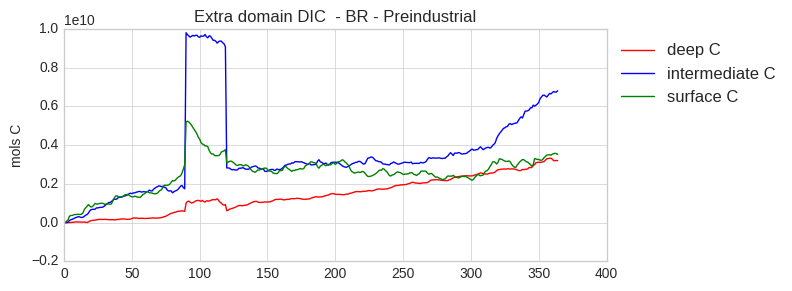

In [12]:
xs = np.arange(0,len(stor_20_100_BR),1)

c_deep_BR = stor_deep_BR[:]
c_20_100_BR = stor_20_100_BR[:]
c_0_20_BR = stor_20_BR[:]
c_tot_BR = stor_mol_BR[:]
c_tot_fromsum_BR = c_deep_BR+c_20_100_BR+c_0_20_BR

c_deep_PI = stor_deep_PI[:]
c_20_100_PI = stor_20_100_PI[:]
c_0_20_PI = stor_20_PI[:]
c_tot_PI = stor_mol_PI[:]
c_tot_fromsum_PI = c_deep_PI+c_20_100_PI+c_0_20_PI

fig = plt.figure(figsize=(7,3))

ax = fig.add_subplot(1,1,1)

#ax.fill_between(xs,(c_deep_BR- c_deep_PI),0,color = 'blue', alpha = 0.2, label = 'deep C')
ax.plot(xs,(c_deep_BR - c_deep_PI), color = 'red', label = 'deep C')
ax.plot(xs,(c_20_100_BR - c_20_100_PI), color = 'blue', label = 'intermediate C')
ax.plot(xs, (c_0_20_BR- c_0_20_PI) , color = 'green', label = 'surface C')

plt.legend(bbox_to_anchor=(0.34, 0.9, 1., .102))

ax.set_ylabel('mols C')
plt.title('Extra domain DIC  - BR - Preindustrial')

difference (end of year - beginning of year) Base run:
6.68598e+08
difference (end of year - beginning of year) Preindustrial run:
-2.53585e+09


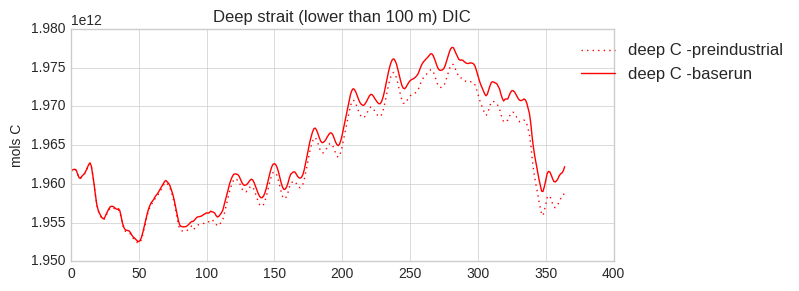

In [13]:
xs = np.arange(0,len(stor_20_100_BR),1)

c_deep_BR = stor_deep_BR[:]
c_20_100_BR = stor_20_100_BR[:]
c_0_20_BR = stor_20_BR[:]
c_tot_BR = stor_mol_BR[:]
c_tot_fromsum_BR = c_deep_BR+c_20_100_BR+c_0_20_BR

c_deep_PI = stor_deep_PI[:]
c_20_100_PI = stor_20_100_PI[:]
c_0_20_PI = stor_20_PI[:]
c_tot_PI = stor_mol_PI[:]
c_tot_fromsum_PI = c_deep_PI+c_20_100_PI+c_0_20_PI

fig = plt.figure(figsize=(7,3))

ax = fig.add_subplot(1,1,1)

#ax.fill_between(xs,(c_deep_BR- c_deep_PI),0,color = 'blue', alpha = 0.2, label = 'deep C')
ax.plot(xs,(c_deep_PI), color = 'red', linestyle = ':', label = 'deep C -preindustrial')
ax.plot(xs,(c_deep_BR), color = 'red', label = 'deep C -baserun')


plt.legend(bbox_to_anchor=(0.34, 0.9, 1., .102))

ax.set_ylabel('mols C')
plt.title('Deep strait (lower than 100 m) DIC')


print('difference (end of year - beginning of year) Base run:')
print(c_deep_BR[len(c_deep_BR)-1]-c_deep_BR[0])
print('difference (end of year - beginning of year) Preindustrial run:')
print(c_deep_PI[len(c_deep_PI)-1]-c_deep_PI[0])